MNIST TEST

In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape, train_y.shape)
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
# one hot encode target values
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
print(train_X.shape, train_y.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [2]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28, 1)
Y_train: (60000, 10)
X_test:  (10000, 28, 28, 1)
Y_test:  (10000, 10)


In [3]:
print(train_X[0].shape)

(28, 28, 1)


In [4]:
# convert from integers to floats
train_norm = train_X.astype('float32')
test_norm = test_X.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [6]:
train_norm.shape

(60000, 28, 28, 1)

In [7]:
train_y.shape

(60000, 10)

In [8]:
model.fit(train_norm, train_y, epochs=10, batch_size=32, verbose=0)

In [9]:
# evaluate model on test dataset
_, acc = model.evaluate(test_X, test_y, verbose=0)
print('> %.3f' % (acc * 100.0))

> 97.160


In [11]:
model.save('final_model.h5')

313/313 [==============================] - 3s 8ms/step


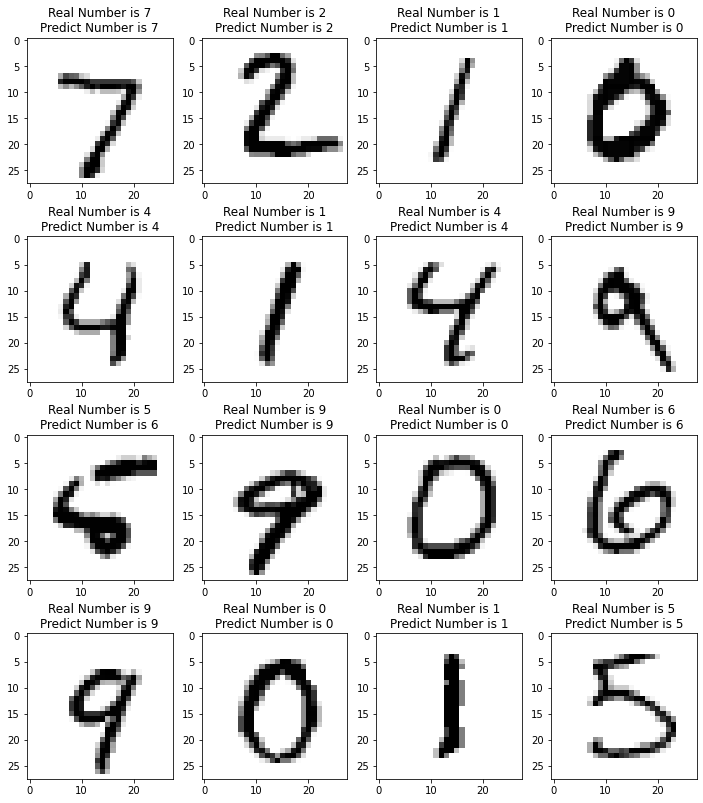

In [12]:
y_pred = model.predict(test_X)
X_test__ = test_X.reshape(test_norm.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {test_y[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");